In [1]:
import os

In [2]:
MCS_root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/MCS모음-19-7월-1/완료한것/'
CBCT_root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/CBCT-Mcs-19-7-1/완료/'
COM_root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/COM-MCS-19-7-1/완료된것들/'


</br>

### Load 3d volume

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_3d_vol(img_paths, mode = 'gray'):
    ''' 
    --- Input ---
    - img_path(list type)
    ex) ['/000/000/001.bmp', '/000/000/002.bmp', ... , '/000/000/999.bmp']
    '''
    color_map = {'gray': cv2.COLOR_BGR2GRAY,
                'rgb' : cv2.COLOR_BGR2RGB}
    
    output = [cv2.cvtColor(cv2.imread(img_path), color_map[mode]) for img_path in img_paths]
    
    return np.array(output)

</br>

### Make Mask (separating label)

In [5]:
def make_mask(img3d):
    ''' 
    --- Input ---
    - img3d : 4d numpy array, [slice, height, width, channel]
    '''
    
    hsv = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[...,0] for img in img3d])    
    s, h, w = hsv.shape
    output = np.ones((s, h, w, 3))
    output[...,1:] = 0
    
    center = np.rot90(hsv[..., 256], 2)
    tmp = np.max(center, 1)
    
    mn_range = [tmp[tmp!=0][-1]-2, tmp[tmp!=0][-1]+2]
    s, h, w = np.where(np.logical_and(hsv>=mn_range[0], hsv<=mn_range[1]))
    output[s, h, w, 1] = 1 # 1 채널에 1 : mn
    output[s, h, w, 0] = 0 # 0 채널에 0
    
    mx_range = [tmp[tmp!=0][0]-2, tmp[tmp!=0][0]+2]
    s, h, w= np.where(np.logical_and(hsv>=mx_range[0], hsv<=mx_range[1]))
    output[s, h, w, 2] = 1 # 2 채널에 1 : mx
    output[s, h, w, 0] = 0 # 0 채널에 0
    
    return output

In [6]:
pat_list = os.listdir(MCS_root)
pat_paths = [os.path.join(MCS_root, i) for i in pat_list] 

pat_paths[0]

'/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/MCS모음-19-7월-1/완료한것/10511071 홍수연'

</br>

### MCS 확인

In [7]:
os.listdir('/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/')

['COM-MCS-19-7-1', 'MCS모음-19-7월-1', 'CBCT-Mcs-19-7-1']

In [21]:
import csv 

data_dict = ['Patient', 'Num Slice', 'Image Size']
data_csv =  open(os.path.join('./data_preview/COM-MCS-19-7-1.csv'), 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(data_csv) 

pat_list = os.listdir(COM_root) # 환자 이름들.

for pat in pat_list :
    
    pat_paths = os.path.join(COM_root, pat)
    
    mxmn_paths = os.path.join(pat_paths, 'Mx Mn')
    mxmn_list = os.listdir(mxmn_paths)
    mxmn_img_paths = [os.path.join(mxmn_paths, i) for i in mxmn_list]
    
    if len(mxmn_list):
        mx_mn = load_3d_vol(mxmn_img_paths, 'rgb')
#         mask = make_mask(mx_mn)  
         
    print(pat, len(mxmn_list), mx_mn.shape)
    csv_writer.writerow([pat, len(mxmn_list), mx_mn.shape ])

data_csv.close()

우석준 1 128 (128, 512, 512, 3)
강다영 1 119 (119, 512, 512, 3)
송민주 1 237 (237, 512, 512, 3)
김희윤 1 418 (418, 512, 512, 3)
최승훈 1 256 (256, 512, 512, 3)
송은하 1 241 (241, 799, 799, 3)
박정환 1 256 (256, 512, 512, 3)
장희선 1 76 (76, 512, 512, 3)
LEE SUN HO - edit 4-13-1-15 293 (293, 512, 512, 3)
장성수 1 181 (181, 799, 799, 3)
나진호 1 256 (256, 512, 512, 3)
강태경 1 256 (256, 512, 512, 3)
강남규 1 147 (147, 512, 512, 3)
김수연 1 256 (256, 512, 512, 3)
KIM JI YEONG 208 (208, 512, 512, 3)
현진옥 1 265 (265, 512, 512, 3)
박호용 1 256 (256, 512, 512, 3)
정지수 1 256 (256, 512, 512, 3)
임세영 1 256 (256, 512, 512, 3)
SHIN EUN BI-1 195 (195, 512, 512, 3)
노혜연 1 187 (187, 512, 512, 3)
김홍주 1 256 (256, 512, 512, 3)
조수봉 1 288 (288, 768, 768, 3)
조예진 1 171 (171, 512, 512, 3)
양정환 1 198 (198, 512, 512, 3)
심소영 1 237 (237, 512, 512, 3)
문준호 1 256 (256, 512, 512, 3)
김창민 1 512 (512, 512, 512, 3)
심규원 1 256 (256, 512, 512, 3)
CHUNG_KYOO_SEON 113 (113, 512, 512, 3)
김기만 1 243 (243, 512, 512, 3)
문강민 1 256 (256, 512, 512, 3)
김영현 1 199 (199, 512, 512, 3

</br>

## 전체파일 

In [10]:
import csv
import os
import numpy as np
from utils import *

data_dict = ['file type', 'patient name', 'original slice', 'mxmn slice', 'mxmn shape', 'mxmn type']
data_csv = open(os.path.join('./data_preview/total.csv'), 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(data_csv)
csv_writer.writerow(data_dict)

root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/'
root_dict = ['CBCT-Mcs-19-7-1/완료/','COM-MCS-19-7-1/완료된것들/', 'MCS모음-19-7월-1/완료한것/']

root_paths = [os.path.join(root, i) for i in root_dict]

num = 0

for root_path in root_paths:
    pat_list = os.listdir(root_path)
    
    num += 1
    
    for pat in pat_list:
        pat_paths = os.path.join(root_path, pat)
        
        ori_paths = os.path.join(pat_paths, 'original')
        mxmn_paths = os.path.join(pat_paths, 'Mx Mn') 
        print(mxmn_paths)
        ori_list = [os.path.join(ori_paths, i) for i in sorted(os.listdir(ori_paths))]
        mxmn_list = [os.path.join(mxmn_paths, i) for i in sorted(os.listdir(mxmn_paths))]
        
        if num == 1 : f_type = 'CBCT-MCS'
        if num == 2 : f_type = 'COM-MCS'
        if num == 3 : f_type = 'MCS 모음'
        
        if len(mxmn_list):
            mm_ = load_3d_vol(mxmn_list, 'rgb')
#             mask = make_mask(mm_)
            csv_writer.writerow([f_type, pat, len(ori_list), len(mxmn_list), mm_.shape, mm_.dtype])
        
data_csv.close()

/var/Mx Mn


FileNotFoundError: [Errno 2] No such file or directory: '/var/original'

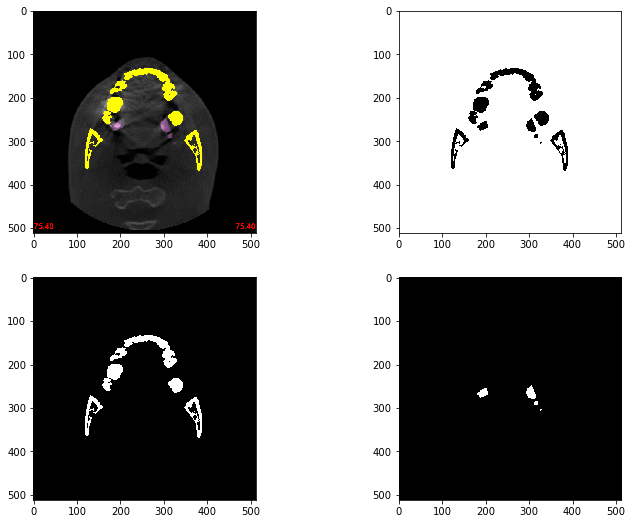

In [87]:
import matplotlib.pyplot as plt

idx = 100

plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(mm_[idx], cmap='gray')

plt.subplot(222)
plt.imshow(mask[idx][..., 0], cmap='gray')

plt.subplot(223)
plt.imshow(mask[idx][..., 1], cmap='gray')

plt.subplot(224)
plt.imshow(mask[idx][..., 2], cmap='gray')